# Machine Learning Project: Stroke Prediction

**Student Name:** Okba Kharef

**Course:** Machine Learning and Data Mining

## 1. Project Objective

The goal of this project is to analyze a dataset of patient attributes to predict the likelihood of a stroke. We will perform a comprehensive analysis which includes:

1.  **Exploratory Data Analysis (EDA):** To understand the data's structure, features, and identify potential challenges .
2.  **Data Preprocessing:** To clean and prepare the data for machine learning models.
3.  **Model Training:** To build and train several classification algorithms, including both basic models and more complex ensemble methods.
4.  **Model Evaluation & Comparison:** To evaluate the models using appropriate metrics for an imbalanced dataset and to compare their performance to identify the most effective algorithm.

## 2. Setup: Importing Libraries

This first code block is for importing all the necessary Python libraries for the project.

In [10]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Optional: for scaling numerical features

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Loading the Data

Here, we load the dataset from the CSV file into a pandas DataFrame.

In [14]:
# Load the dataset
#dataset URL= https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')


## 4. Exploratory Data Analysis (EDA)

In this section, we explore the data to understand its properties and find any issues that need to be addressed.

### 4.1. Initial Data Inspection

Let's look at the first few rows, the data types, and a statistical summary.

In [15]:
# Display the first 5 rows of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Get a concise summary of the dataframe, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Observation:** From the `.info()` output, we can see that the `bmi` column has missing values.

In [17]:
# Get descriptive statistics for numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
# This helps check for any weird or rare categories.

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
------------------------------
Value counts for column: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------------------
Value counts for column: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
------------------------------
Value counts for column: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
------------------------------
Value counts for column: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
------------------------------


### 4.2. Handling Missing Values

As we saw, the `bmi` column has missing values. We will fill these using the median value of the column, as the median is less sensitive to outliers than the mean.

In [20]:
# Calculate the median of the 'bmi' column
bmi_median = df['bmi'].median()

# Fill the missing values in 'bmi' with the median
df['bmi'].fillna(bmi_median, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### 4.3. Data Visualization

Visualizing the data is the best way to understand it.

#### Target Variable: `stroke`

This plot will show us the distribution of our target variable and reveal if we have a class imbalance problem.

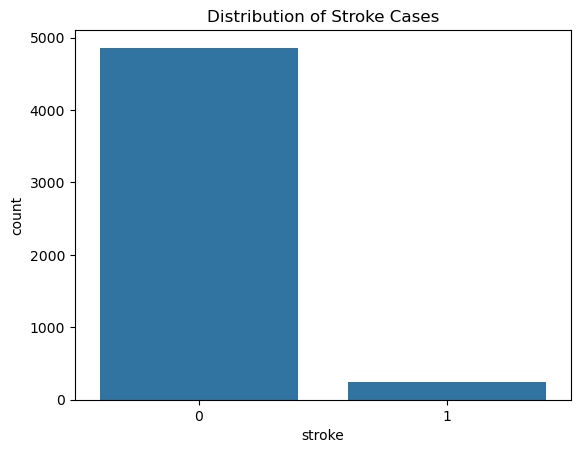

In [26]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.show()

**Observation:** The dataset is **highly imbalanced**. The number of patients who had a stroke (1) is far less than those who did not (0). This is a critical finding and must be addressed before modeling.

#### Numerical and Categorical Features

Let's visualize the distributions of other features.

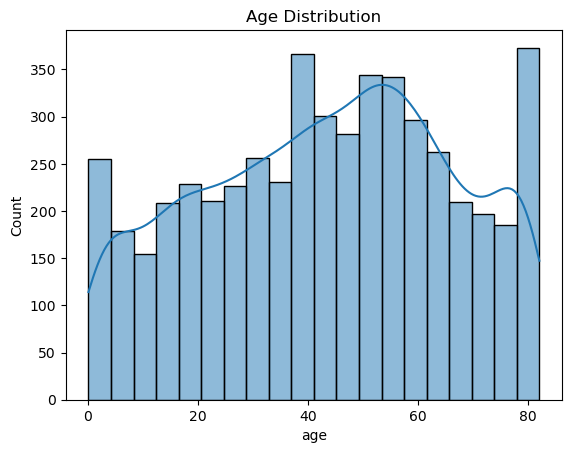

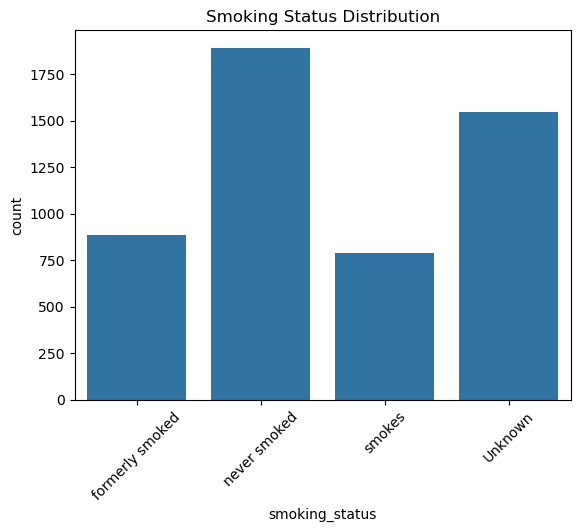

In [27]:
# Example: Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Example: Smoking Status
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking Status Distribution')
plt.xticks(rotation=45)
plt.show()

## 5. Data Preprocessing

Now we prepare the data for the machine learning models. This involves converting categorical features into numerical ones and splitting the data into training and testing sets.

### 5.1. Categorical Feature Encoding

Machine learning models require all input features to be numeric. We will use **One-Hot Encoding** to convert categorical columns into a numerical format. The `id` column is just an identifier and is not useful for prediction, so we will drop it.

In [ ]:
#  handle the 'Other' gender category 
df = df[df['gender'] != 'Other']

# Drop the 'id' column as it's not a predictive feature
df = df.drop('id', axis=1)

# Use pandas get_dummies to perform one-hot encoding on categorical features
df_processed = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the processed dataframe
df_processed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


### 5.2. Train-Test Split

We split the data into a training set (to build the model) and a testing set (to evaluate the model on unseen data).

In [24]:
# Define our features (X) and target (y)
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

# Split the data into 80% training and 20% testing
# We use 'stratify=y' to ensure the proportion of stroke vs. non-stroke is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.3. Handling Class Imbalance with SMOTE

To solve the imbalance problem, we will use the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE creates new, synthetic data points for the minority class (stroke cases).

**Crucial Note:** We only apply SMOTE to the **training data**. We want to evaluate our model on the original, real-world distribution of the test data.

In [25]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable in the new balanced training set
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: stroke
0    3888
1     199
Name: count, dtype: int64
After SMOTE: stroke
0    3888
1    3888
Name: count, dtype: int64


## 6. Model Training and Evaluation

Now we will train our models on the SMOTE-balanced training data and evaluate them on the original, unbalanced test data. For each model, we will look at key metrics like F1-Score, Precision, Recall, and ROC-AUC, which are more informative than accuracy for imbalanced datasets.

In [29]:
# Create a dictionary to store the results of each model
results = {}

### 6.1. Model 1: Logistic Regression (Baseline)

This is a simple, fundamental classification algorithm that serves as a good baseline.

In [30]:
# 1. Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# 3. Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# 4. Store results
results['Logistic Regression'] = {
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'ROC-AUC': roc_auc_score(y_test, y_pred_log_reg)
}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.14      0.44      0.21        50

    accuracy                           0.84      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.93      0.84      0.87      1022



### 6.2. Model 2: K-Nearest Neighbors (KNN)

Now, follow the same 4 steps as above for the KNN model.

In [ ]:
# 1. Initialize and train the model
# We choose n_neighbors=5 as a common starting point for KNN.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# 3. Evaluate the model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# 4. Store results in our dictionary for later comparison
results['K-Nearest Neighbors'] = {
    'F1-Score': f1_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_knn)
} 

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022



### 6.3. Model 3: Decision Tree

Follow the same pattern for the Decision Tree model.

In [33]:
# 1. Initialize and train the model
# We set random_state=42 to ensure we get the same results every time we run the code.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# 3. Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# 4. Store results for our final comparison
results['Decision Tree'] = {
    'F1-Score': f1_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_dt)
}


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.08      0.16      0.11        50

    accuracy                           0.87      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.91      0.87      0.89      1022



### 6.4. Model 4: Random Forest (Ensemble)

This is our first ensemble model.

In [34]:
# 1. Initialize and train the model
# random_state ensures the results are reproducible.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# 3. Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 4. Store results for our final comparison
results['Random Forest'] = {
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf)
}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.18      0.16      0.17        50

    accuracy                           0.92      1022
   macro avg       0.57      0.56      0.57      1022
weighted avg       0.92      0.92      0.92      1022



### 6.5. Model 5: Gradient Boosting (Ensemble)

This is another powerful ensemble model.

In [35]:
# 1. Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# 3. Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# 4. Store results for our final comparison
results['Gradient Boosting'] = {
    'F1-Score': f1_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb)
}


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.16      0.40      0.23        50

    accuracy                           0.87      1022
   macro avg       0.56      0.65      0.58      1022
weighted avg       0.93      0.87      0.89      1022



## 7. Model Comparison

Finally, we will compile the results from all models into a single DataFrame and visualize them to easily compare their performance.

In [ ]:
# Convert the results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results).T # .T transposes the DataFrame for better readability

print("Model Performance Comparison:")
results_df

In [ ]:
# Visualize the comparison, focusing on F1-Score
results_df['F1-Score'].sort_values(ascending=False).plot(kind='bar')
plt.title('Comparison of Model F1-Scores')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

## 8. Conclusion

In this section, you will write your final report based on the results.

*   **Summary of Work:** Briefly restate the project's objective and the steps you took (EDA, preprocessing with SMOTE, model training).
*   **Best Model:** Identify which model performed the best. Justify your choice by referring to the evaluation metrics (e.g., "The Random Forest model was chosen as the best-performing model due to its highest F1-Score of [value] and ROC-AUC score of [value], indicating a strong balance between precision and recall.").
*   **Insights:** Discuss the results. Did the ensemble models (Random Forest, Gradient Boosting) perform better than the basic models (Logistic Regression, KNN)? Why do you think that is? (Hint: Ensembles combine multiple models to reduce errors and improve generalization).
*   **Limitations & Future Work:** Mention any limitations (e.g., the dataset size is still relatively small) and suggest what could be done next (e.g., collecting more data, trying more advanced models like XGBoost, or performing hyperparameter tuning to optimize the best model).